**bold text**##**Real Estate Valuation Prediction**

Attribute Information:
The inputs are as follows

X1=the transaction date (for example, 2013.250=2013 March, 2013.500=2013 June, etc.)

X2=the house age (unit: year)

X3=the distance to the nearest MRT station (unit: meter)

X4=the number of convenience stores in the living circle on foot (integer)

X5=the geographic coordinate, latitude. (unit: degree)

X6=the geographic coordinate, longitude. (unit: degree)

The output is as follow

Y= house price of unit area


In [ ]:
# importing libraries
import numpy as np
import pandas as pd
from numpy import math
from scipy.stats import zscore

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# loading the dataset
temp_df=pd.read_csv('/content/Real estate valuation data set.xlsx.csv')

##**Preprocessing of data**

In [ ]:
temp_df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [ ]:
temp_df.tail()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5
413,414,2013.500,6.5,90.45606,9,24.97433,121.54310,63.9


In [ ]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [ ]:
# droping unnecessary column
df=temp_df.drop('No',axis=1)

In [ ]:
df.columns

Index(['X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [ ]:
# renaming columns with appropriate names
df.rename(columns=
          {'X1 transaction date' : 'transaction_date' ,
           'X2 house age' : 'house_age' ,
           'X3 distance to the nearest MRT station' : 'distance_to_the_nearest_MRT_station' ,
           'X4 number of convenience stores' : 'number_of_convenience_stores' , 
           'X5 latitude' : 'latitude' ,
           'X6 longitude' : 'longitude' ,
           'Y house price of unit area' : 'house_price'
          }
          ,inplace=True)

##**EDA**

**Correlation matrix and heatmap**




In [ ]:
# correlation matrix of variables
df.corr()

,transaction_date,house_age,distance_to_the_nearest_MRT_station,number_of_convenience_stores,latitude,longitude,house_price
transaction_date,1.000000,0.017549,0.060880,0.009635,0.035058,-0.041082,0.087491
house_age,0.017549,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
distance_to_the_nearest_MRT_station,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
number_of_convenience_stores,0.009635,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
latitude,0.035058,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
longitude,-0.041082,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
house_price,0.087491,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


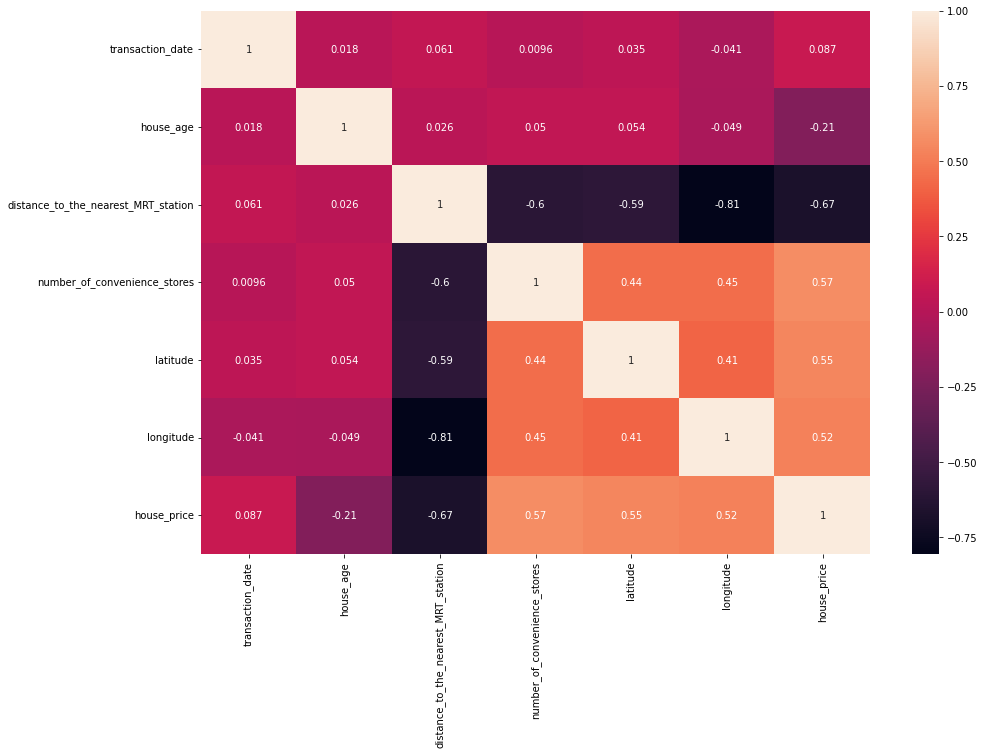

In [ ]:
sns.heatmap(df.corr(),annot = True)

From this heatmap, it can be concluded that there is no perfect multicollinearity but there is imperfect multi collinearity between longitude and distance between metro station as it can be thought intuitively also that as longitudinal co-ordinate changes then accordingly distance from metro station would also change.
All three attributes longitude, latitude and distance from nearest metro station gives insight about the same thing i.e., the effect of location on prices. So, instead using all three variables in regression it would be better to try only one of them in the final equation.


**Scatter plots**

Text(0.5, 1.0, 'house_price vs longitude')

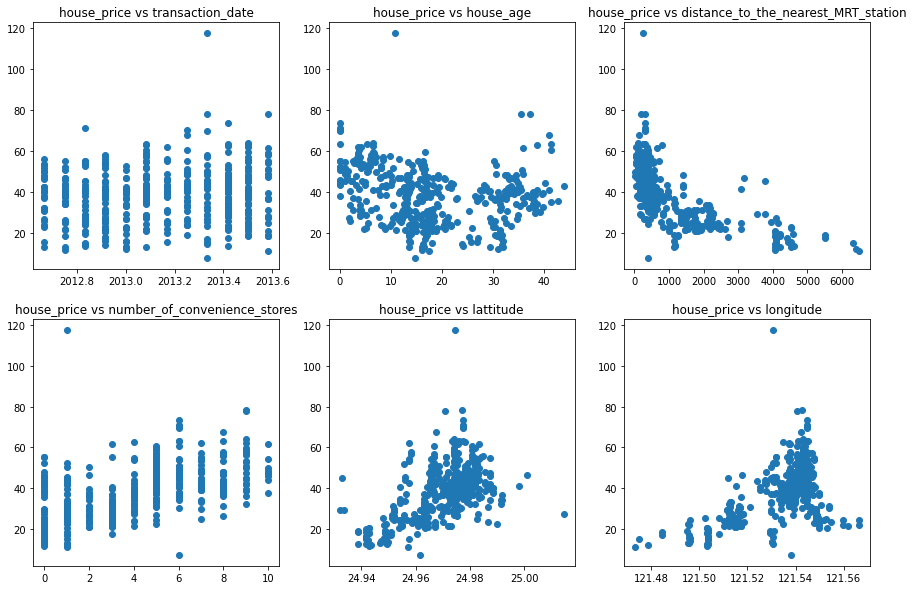

In [ ]:
plt.rcParams['figure.figsize'] = [15,10]
fig , axis = plt.subplots(2,3)
axis[0,0].scatter(df.transaction_date,df.house_price)
axis[0,0].set_title('house_price vs transaction_date')
axis[0,1].scatter(df.house_age,df.house_price)
axis[0,1].set_title('house_price vs house_age')
axis[0,2].scatter(df.distance_to_the_nearest_MRT_station,df.house_price)
axis[0,2].set_title('house_price vs distance_to_the_nearest_MRT_station')
axis[1,0].scatter(df.number_of_convenience_stores,df.house_price)
axis[1,0].set_title('house_price vs number_of_convenience_stores')
axis[1,1].scatter(df.latitude,df.house_price)
axis[1,1].set_title('house_price vs lattitude')
axis[1,2].scatter(df.longitude,df.house_price)
axis[1,2].set_title('house_price vs longitude')

It can be drawn form these scatter plots that house nearer to metro station as well as houses that are new i.e., those which less age have higher prices. 

**Histogram**

Text(0.5, 1.0, 'number_of_convenience_stores')

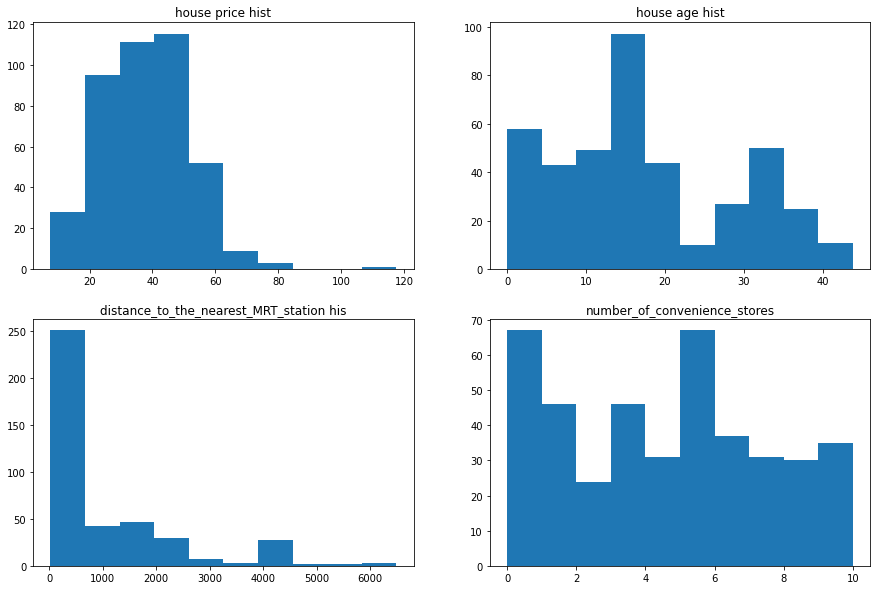

In [ ]:
fig , axis = plt.subplots(2,2)
axis[0,0].hist(df.house_price)
axis[0,0].set_title('house price hist')
axis[0,1].hist(df.house_age)
axis[0,1].set_title('house age hist')
axis[1,0].hist(df.distance_to_the_nearest_MRT_station)
axis[1,0].set_title('distance_to_the_nearest_MRT_station his')
axis[1,1].hist(df.number_of_convenience_stores)
axis[1,1].set_title('number_of_convenience_stores')

From the above charts, it can be it can be assumed that variables house price, house age and number of convenient stores are symmetric and thus are normal. The variable distance from the nearest metro station seems to be positively skewed but can be standardised for our convenience.

In [ ]:
# log transformation
distance_to_the_nearest_MRT_station = np.log10(df.distance_to_the_nearest_MRT_station)

(array([ 2.,  6., 27., 44., 78., 94., 39., 54., 34., 36.]),
 array([1.36889726, 1.61321876, 1.85754026, 2.10186175, 2.34618325,
        2.59050475, 2.83482625, 3.07914775, 3.32346925, 3.56779075,
        3.81211225]),
 <a list of 10 Patch objects>)

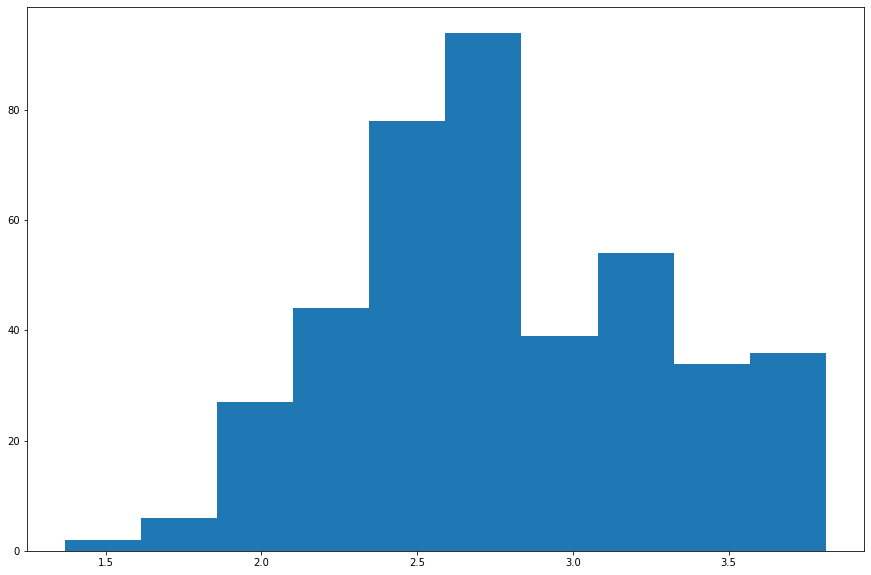

In [ ]:
plt.hist(distance_to_the_nearest_MRT_station)

From the above chart it can be drawn that the variable distance from the nearest metro station is standardised as it seems to be symmetric in nature.

In [ ]:
# replacing earlier column with transformed one
df['distance_to_the_nearest_MRT_station'] = distance_to_the_nearest_MRT_station

In [ ]:
df.head()

,transaction_date,house_age,distance_to_the_nearest_MRT_station,number_of_convenience_stores,latitude,longitude,house_price
0,2012.917,32.0,1.928799,10,24.98298,121.54024,37.9
1,2012.917,19.5,2.486565,9,24.98034,121.53951,42.2
2,2013.583,13.3,2.749724,5,24.98746,121.54391,47.3
3,2013.500,13.3,2.749724,5,24.98746,121.54391,54.8
4,2012.833,5.0,2.591697,5,24.97937,121.54245,43.1


##**Train-Test Split**

In [ ]:
dependent_variable = 'house_price'
independent_variables = list(set(df.columns.tolist()) - {dependent_variable})

In [ ]:
features = ['house_age' , 'distance_to_the_nearest_MRT_station' , 'number_of_convenience_stores']

In [ ]:
# z-score transformation
X = df[features].apply(zscore).values

In [ ]:
y = df[dependent_variable].values

In [ ]:
X_train , X_test , y_train , y_test = train_test_split( X , y , test_size = 0.33 , random_state= 1)

In [ ]:
X_train[0:10]

array([[-0.41415568, -0.17236272,  0.30788458],
       [-1.24904769,  0.21289952, -0.37192457],
       [-0.98539758, -1.68716098,  1.66750286],
       [ 1.38745338,  1.07163411, -0.71182914],
       [ 0.69317477,  1.810234  , -1.39163828],
       [ 1.07986159,  0.47328054,  0.30788458],
       [ 1.22926332,  0.59372193, -1.39163828],
       [-1.19631767, -0.57749015,  0.30788458],
       [-1.22268268, -0.39471093,  0.30788458],
       [-0.7744775 ,  0.76639081, -1.39163828]])

#**Model Fitting**

#**Linear Regression**

In [ ]:
reg = LinearRegression().fit(X_train, y_train)

In [ ]:
y_pred_reg = reg.predict(X_test)

In [ ]:
MSE  = mean_squared_error(y_test,y_pred_reg)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(y_test, y_pred_reg)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(y_test,y_pred_reg))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 103.6402980723209
RMSE : 10.180387913646557
R2 : 0.5228879537321132
Adjusted R2 :  0.5121260278764466


#**Lasso Regression**

In [ ]:
from sklearn.linear_model import Lasso
lasso  = Lasso(alpha=0.1 , max_iter= 3000)

In [ ]:
lasso.fit(X_train , y_train)

Lasso(alpha=0.1, max_iter=3000)

In [ ]:
y_pred = lasso.predict(X_test)

In [ ]:
MSE  = mean_squared_error(y_test,y_pred)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(y_test, y_pred)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 103.92314184981943
RMSE : 10.19427004987701
R2 : 0.5215858716659048
Adjusted R2 :  0.5107945755380681


**Cross validation and Hyperparameter Tuning**

In [ ]:
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=3)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1e-15}

Using  {'alpha': 1e-15}  the negative mean squared error is:  -68.0338280854099


In [ ]:
y_pred_lasso = lasso_regressor.predict(X_test)

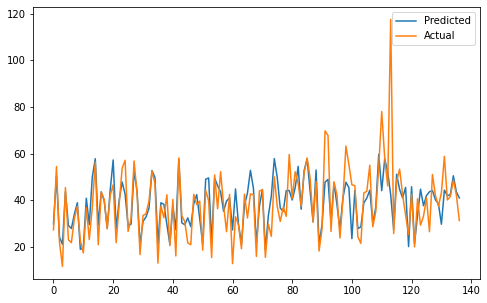

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(y_pred_lasso)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.show()

In [ ]:
MSE  = mean_squared_error(y_test,y_pred_lasso)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(y_test,y_pred_lasso)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(y_test,y_pred_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 103.64029807232093
RMSE : 10.180387913646559
R2 : 0.522887953732113
Adjusted R2 :  0.5121260278764465


#**Ridge Regression**

In [ ]:
ridge  = Ridge(alpha=0.1)

In [ ]:
ridge.fit(X_train , y_train)

Ridge(alpha=0.1)

In [ ]:
y_pred_ridge = ridge.predict(X_test)

In [ ]:
MSE  = mean_squared_error(y_test,y_pred_ridge)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(y_test,y_pred_ridge)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(y_test,y_pred_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 103.64805163258066
RMSE : 10.180768715209116
R2 : 0.5228522599231393
Adjusted R2 :  0.512089528943962


**Cross validation and Hyperparameter Tuning**

In [ ]:
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1e-15}

Using  {'alpha': 1e-15}  the negative mean squared error is:  -68.03382808540991


In [ ]:
y_pred_r = ridge_regressor.predict(X_test)

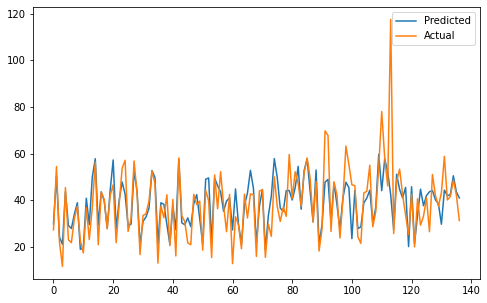

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(y_pred_r)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.show()

In [ ]:
MSE  = mean_squared_error(y_test,y_pred_r)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(y_test,y_pred_r)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(y_test,y_pred_r))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 103.6402980723209
RMSE : 10.180387913646557
R2 : 0.5228879537321132
Adjusted R2 :  0.5121260278764466


#**Elastic Net Regression**

In [ ]:
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [ ]:
elasticnet.fit(X_train,y_train)

ElasticNet(alpha=0.1)

In [ ]:
y_pred_elst = elasticnet.predict(X_test) 

In [ ]:
MSE  = mean_squared_error(y_test,y_pred_elst)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(y_test,y_pred_elst)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(y_test,y_pred_elst))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 104.94261393701771
RMSE : 10.2441502301078
R2 : 0.5168926932142492
Adjusted R2 :  0.5059955359183301


**Cross validation and Hyperparameter Tuning**

In [ ]:
elastic = ElasticNet()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}
elastic_regressor = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)
elastic_regressor.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.514e+03, tolerance: 3.828e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.222e+03, tolerance: 4.120e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]},
             scoring='neg_mean_squared_error')

In [ ]:
y_pred_elastic = elastic_regressor.predict(X_test)

In [ ]:
print("The best fit alpha value is found out to be :" ,elastic_regressor.best_params_)
print("\nUsing ",elastic_regressor.best_params_, " the negative mean squared error is: ", elastic_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.01, 'l1_ratio': 0.3}

Using  {'alpha': 0.01, 'l1_ratio': 0.3}  the negative mean squared error is:  -70.91297848153181


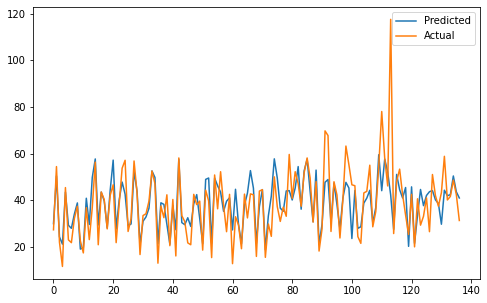

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(y_pred_elastic)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.show()

In [ ]:
MSE  = mean_squared_error(y_test,y_pred_elastic)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(y_test,y_pred_elastic)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(y_test,y_pred_elastic))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 103.7994974586867
RMSE : 10.188203838689462
R2 : 0.5221550733139135
Adjusted R2 :  0.5113766163209943


#**Conclusion**

That's it! We reached the end of our exercise.
Starting with loading the data so far, we have done EDA, null values treatment, feature selection and then model building. The R squared of our model is 52% which can be said to be good for this dataset. This performance could be due to various reasons like: no proper pattern of data, not enough relevant features. 
